<a href="https://colab.research.google.com/github/robitussin/CCMACLRL_EXERCISES/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

## Instructions:

Create a directory in your google drive using this folder structure

```
My Drive
- Images
  - Train
    - Elizer
    - Eliza
  - Test
```

- Upload 30 images of your self (selfied are recommended) in the Train folder
- Upload 30 images of your partner in the Train folder
- Upload 10 images of yourself and your partner in the Test Folder
- Use **.png** or **.jpg** or **.jpeg** images files

In [ ]:
#pip install numpy opencv-python scikit-learn

## Import libraries

In [145]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


## Mount Google Drive

In [11]:
#from google.colab import drive
#drive.mount('/content/drive')

## Display one raw image directly from your drive

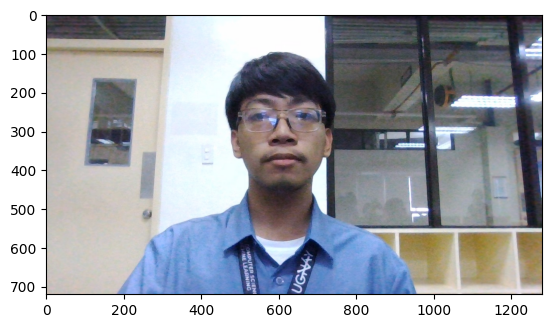

In [165]:
image_path = r"C:\Users\Neil\Documents\VSC\CCMACLRL-Repos\Exercise 8\Training Dataset\Baltar_Face_Dataset\WIN_20241011_15_10_54_Pro.jpg"
def displayImage(image_path):
  image = Image.open(image_path)
  
  # Display the image using matplotlib
  plt.imshow(image)
  plt.axis('on')  # Hide axes for cleaner display
  plt.show()
  
displayImage(image_path)

## Load the images from your drive and apply preprocessing to your raw images

In [187]:
def load_images_from_folder(folder):
    images = []
    labels = []
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        person_name = os.path.basename(person_folder)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
            img = cv2.resize(img, (1000, 1000))  # Resize to 100x100 pixels
            images.append(img.flatten())  # Flatten the image
            labels.append(person_name)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder(r'C:\Users\Neil\Documents\VSC\CCMACLRL-Repos\Exercise 8\Training Dataset')

In [188]:
images.shape

(220, 1000000)

In [175]:
labels.shape

(215,)

In [97]:
labels

array(['Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dataset',
       'Baltar_Face_Dataset', 'Baltar_Face_Dat

## Display one pre-processed image from the training set

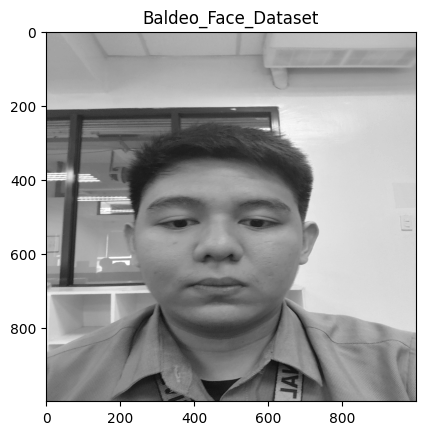

In [150]:
image = images[0].reshape(1000,1000)  # Access the first image
name = labels[0]  # Get the name corresponding to the image

# Display the image
plt.imshow(image, cmap="gray")
plt.title(name)
plt.axis('on')  # Hide axes
plt.show()

## Display ten pre-processed images from the training set

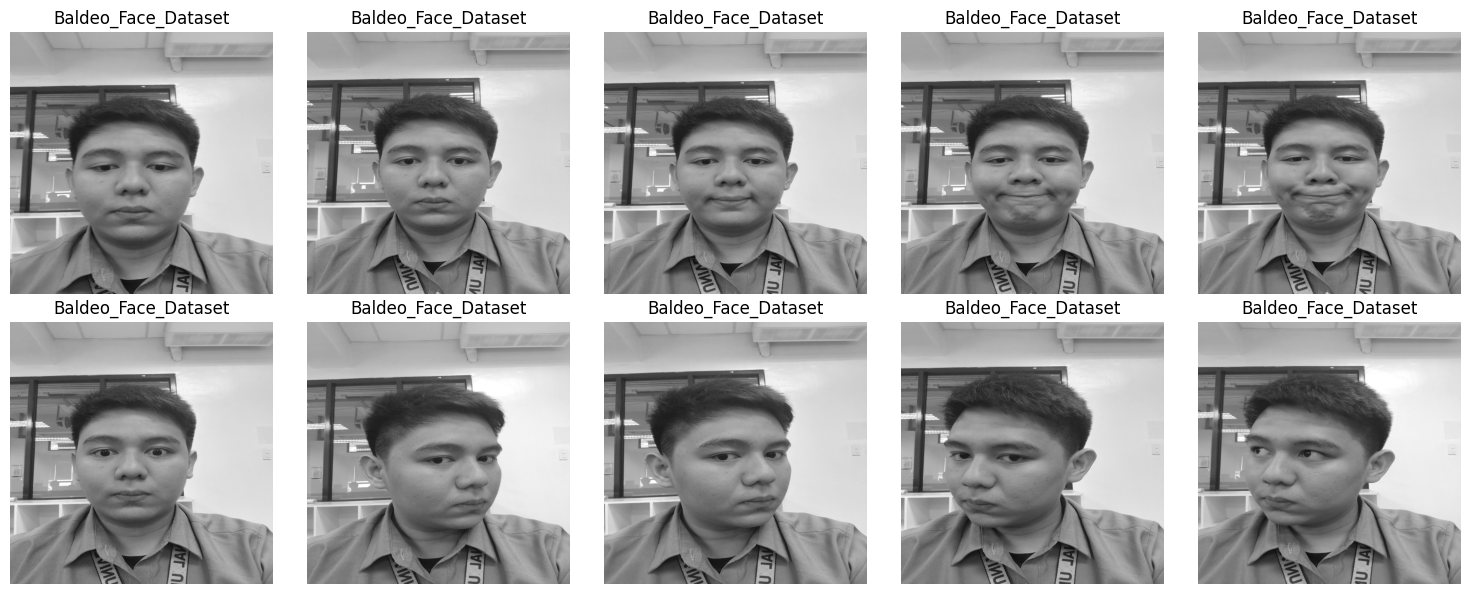

In [127]:
num_faces = 10

fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows and 5 columns
axes = axes.flatten()  # Flatten the array of axes for easy indexing

# Loop to display the images
for i in range(num_faces):
    image = images[i].reshape(1000,1000)  # Access the i-th image
    name = labels[i]  # Get the name corresponding to the image

    axes[i].imshow(image, cmap='gray')  # Show the image
    axes[i].set_title(name)  # Set the title to the name
    axes[i].axis('off')  # Hide axes

# Adjust layout
plt.tight_layout()
plt.show()

## Split your data

In [189]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

## Train your SVM model

In [190]:
model = svm.SVC(gamma='scale')  # You can choose different kernels like 'linear', 'rbf', etc.
model.fit(x_train, y_train)

SVC()

## Evaluate your model

In [191]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 100.00%


## Test your model using images not in your training set

Test one image of yourself

In [192]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (1000, 1000)).flatten().reshape(1, -1)  # Flatten and reshape for prediction
    prediction = model.predict(img)
    return prediction

Predicted label: ['Baltar_Face_Dataset']


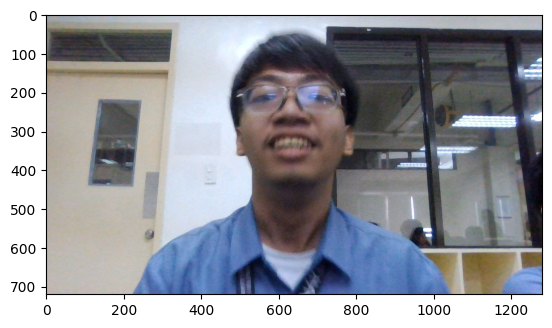

In [195]:
img_path = r"C:\Users\Neil\Documents\VSC\CCMACLRL-Repos\Exercise 8\Test Dataset\WIN_20241011_15_34_34_Pro.jpg"
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)

Test one image of your partner

Predicted label: ['Hipolito_Face_Dataset']


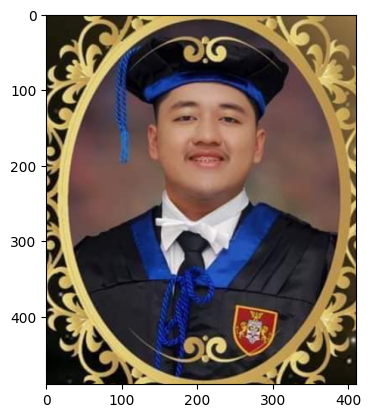

In [194]:
img_path = r'C:\Users\Neil\Documents\VSC\CCMACLRL-Repos\Exercise 8\Test Dataset\Screenshot 2024-10-11 160554.png'
result = predict_image(img_path, model)
print(f'Predicted label:', result)
displayImage(img_path)